In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
fun= lambda x: (2-2*x[0]-3*x[1])**2 + (x[0])**2 + (x[1]-1)**2

def g(x):
  return np.array([(10*x[0]+12*x[1]-8), (12*x[0]+20*x[1]-14)])

H = np.array([[10,12],[12,20]])

In [21]:
def linesearch(x):
    a = 1
    t = 0.7
    d = -1 * g(x)
    def pi(a, x):
      return fun(x) - a * t * np.matmul(np.transpose(g(x)), d)
    while pi(a, x) < fun(x + a * d):
      a = 0.5 * a
    return a

def gradient(fun, g, H, x0, max_iter):
  x=x0
  iter=0
  grad_norm= np.linalg.norm(g(x))
  grad_norm_history =[grad_norm]
  path=[x0]
  while grad_norm> 1e-03 and iter<=max_iter:
    a=linesearch(x)
    x = x - a*(g(x))
    grad_norm=np.linalg.norm(g(x))
    path.append(x)
    grad_norm_history.append(grad_norm)
    iter +=1
    if max_iter==iter:
        print(f'Number of iterations exceeded, not converged to given thershold\ncurrent error value is {grad_norm}')
        return x,grad_norm_history,path
  x1 = 1-(2*x[0]+3*x[1]) 
  x=np.insert(x,0,x1)
  print(f'converged\nnumber of iterations: {iter} \nx1 = {x[0]}\nx2 = {x[1]}\nx3 = {x[2]}')
  return x,grad_norm_history,path

def Newton(fun, g, H, x0, max_iter):
  x=x0
  grad_norm = np.linalg.norm(g(x))
  grad_norm_history =[grad_norm]
  path=[x0]
  iter=0
  while grad_norm >= 1e-03 and iter<=max_iter:
  #     x = x - a * grad(x)
      x = x - np.matmul(np.linalg.inv(H), g(x))
      grad_norm = np.linalg.norm(g(x))
      grad_norm_history.append(grad_norm)
      path.append(x)
      iter +=1
      if max_iter==iter:
         print(f'Number of iterations exceeded, not converged to given thershold\ncurrent error value is {grad_norm}')
         return x,grad_norm_history,path
  x1 = 1-(2*x[0]+3*x[1])
  x=np.insert(x,0,x1)
  print(f'converged\nnumber of iterations: {iter} \nx1 = {x[0]}\nx2 = {x[1]}\nx3 = {x[2]}')
  return x,grad_norm_history,path 
      

In [22]:

def results (fun, g, h, x0, method,max_iter):

  if (method !='N') and (method !='G') :
    return print(f'[error]: Invalid Method -> {method}\nonly G -> Gradinet and N -> Newton present')

  f_conv, ax_conv = plt.subplots()
  ax_conv.set_yscale("log")
  ax_conv.set_ylabel('log error')
  ax_conv.set_xlabel('iteration')
  # ax_conv.legend(loc="upper left")

  f_path, ax_path = plt.subplots()
  ax_path.set_ylabel('vlaue')
  ax_path.legend(['First line', 'Second line'])
  ax_path.set_xlabel('iteration')


  f, ax = plt.subplots()
  ax.set_ylabel('Error')
  ax.set_xlabel('iteration')
  # ax.legend(loc="upper left")


  if (method =='G'):
    x,error_history,path=gradient(fun, g, H, x0,max_iter)
    plt.figure()
    plt.ylabel(r'|$f_k$-$f^{*}$|')
    plt.yscale('log')
    plt.xlabel('Iteration #, k')
    ax_conv.set_title('log-linear convergence plot using Gradient Method')
    ax_path.set_title('Path plot using Gradient Method')
    ax.set_title('convergence plot using Gradient Method')
  elif (method=='N'):
    x,error_history,path=Newton(fun, g, H, x0,max_iter)
    ax_conv.set_title('log-linear convergence plot using Newton Method')
    ax_path.set_title('Path plot using Newton Method')
    ax.set_title('convergence plot using Newton Method')

  ax_conv.plot((error_history))
  ax.plot((error_history))
  ax_path.plot((path))
  
  return x,path


converged
number of iterations: 59 
x1 = -1.0715493964759233
x2 = -0.1427692114423011
x3 = 0.7856959397868418


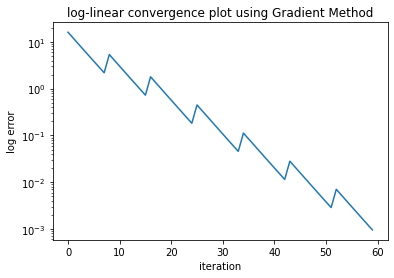

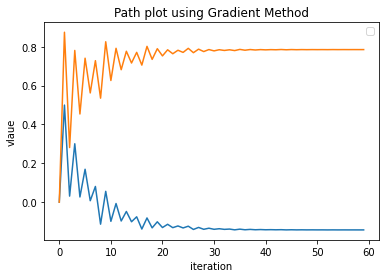

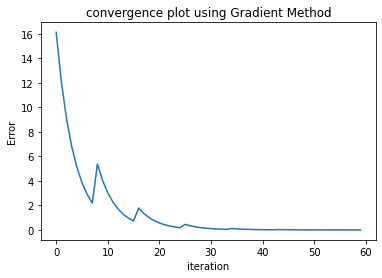

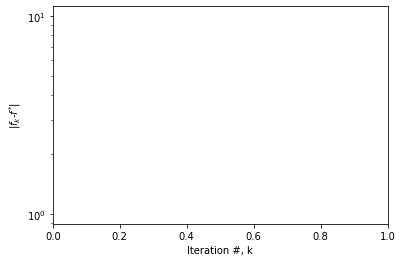

In [23]:
x,path=results(fun, g, H, np.array([0,0]),"G",100)

In [17]:
abs(path[1]-[x[1],x[2]])

array([0.64276921, 0.08930406])

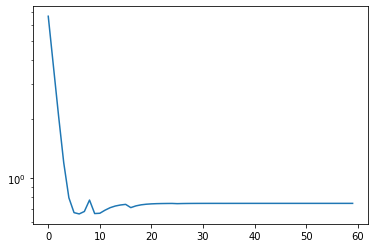

In [20]:
Conv_error = np.zeros(len(path))
for i in range(0, len(path)):
    Conv_error[i] = np.linalg.norm(fun(path[i]) - [x[1],x[2]])
plt.plot(Conv_error)
plt.yscale('log')

converged
number of iterations: 1 
x1 = -1.0714285714285552
x2 = -0.1428571428571388
x3 = 0.7857142857142776


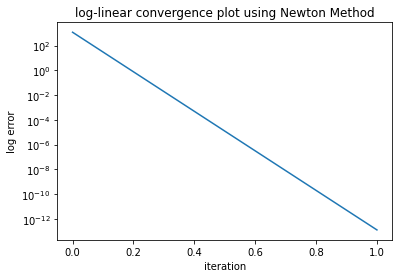

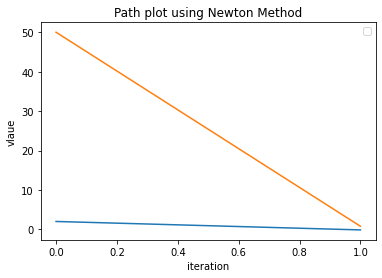

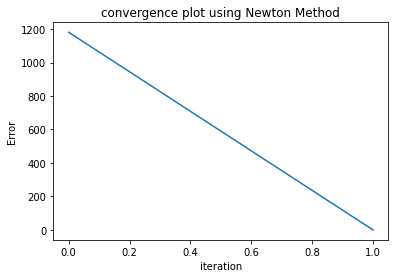

In [ ]:
x=results(fun, g, H, np.array([2,50]),"N",100)